In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
def save_fig(name):
    plt.savefig('./figures/interpolated_x1/' + name + '.pdf', bbox_inches='tight', transparent=True)
    plt.savefig('./figures/interpolated_x1/' + name + '.png', bbox_inches='tight', transparent=True, dpi=900)

plt.rcParams['figure.figsize'] = (2.5,2.5)

plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['font.size'] = 10
plt.rcParams['legend.title_fontsize'] = 9

plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)

In [3]:
trefoil_df = pd.read_csv('trefoil_list.csv')

trefoil_df.Representative = list(map(lambda x: x if x == 'Other' else x[:4].upper(), trefoil_df.Representative))

In [4]:
def get_iso(noise):
    if noise == 0:
        return np.loadtxt('./data/validation/landscape_iso_x1.txt')[:363]
    return np.loadtxt('./data/validation/landscape_iso_x1_v{}.txt'.format(noise))[:363]

In [5]:
labels = list(trefoil_df.Representative)[:363] # This takes just proteins in the main clusters

In [22]:
xs = [x/10 for x in range(10)] + [1]

values = [metrics.silhouette_score(get_iso(noise), labels) for noise in xs]

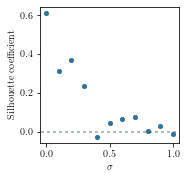

In [23]:
ax = sns.scatterplot(x=xs, y=values, edgecolor="DarkSlateGray", s=20, linewidth=0.5)
ax = sns.lineplot(ax=ax, x=[-1, 2], y=[0,0], style=True, dashes=[(2,2)], color='DarkSlateGray', alpha=0.5)
ax.set_xlim([-0.05, 1.05])

ax.set_xlabel('$\sigma$')
ax.set_ylabel('Silhouette coefficient')

ax.get_legend().remove()

save_fig('silhouette')